In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.linalg as scl

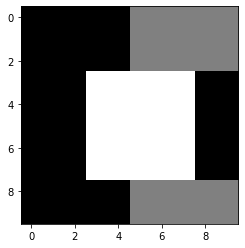

In [61]:
pic = np.zeros((10,10))
pic[3:8,3:8] = 1

pic[0:3,5:] = 0.5
pic[8:,5:] = 0.5
plt.imshow(pic,'gray')

In [62]:
m =  pic.reshape((100,1))

In [63]:
k = 100
L = 100
N = 100

In [64]:
C = np.random.randn(L,k)

In [65]:
h = np.random.randn(N,1)
B = np.random.randn(L,N)
w = np.matmul(B,h)

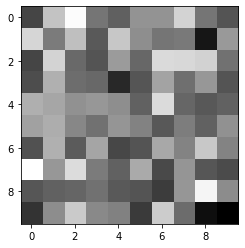

In [66]:
plt.imshow(w.reshape((10,10)), 'gray')

In [239]:
X = np.matmul(h,m.reshape((1,k)))

In [177]:
#X = np.matmul(np.diag(h.reshape(100,)), m)

In [255]:
tau = 5000
delta = 0.01

l = 1
eps = 0.01

k_max = 400

In [264]:
#ans = np.zeros((100,100))
#for col in range(L):
  #  matr  = np.matmul(scl.circulant(C[:,col]), B)
#vec = X[col]
y = np.matmul(B, X)
#print(vec)


k0 = tau / np.linalg.norm(y)
Y  = k0 * delta * y
Y = Y#.reshape((100,1))
r = 0

for j in range(k_max):
#    print(j)
    s = r + l
    ind = 0
    while True:
        u, sigma, vh = np.linalg.svd(Y)
       # print(u.shape, vh.shape, Y.shape)
        u = u[:,:s]
        #print(u)
        sigma = sigma[:s]
      #  print(sigma)
        vh = vh[:s]
        s += l
        ind += 1

        if ((sigma[-1] <= tau) or (ind > 10)):
            break


    if ind > 10:
        break
    r = np.argmax(sigma)
    Xk = (sigma[0] - tau) * np.matmul(u[:,0].reshape((100,1)), vh[0,:].reshape((1,100)))

    for i in range(1,s-l):
        #print(i, s)
        #print(u.shape)
        #u[:,i]
        Xk += (sigma[i] - tau) * np.matmul(u[:,i].reshape((100,1)), vh[i,:].reshape((1,100)))
  #  Xk = Xk.reshape((100,1))
    if np.linalg.norm(B@(Xk-X), ord='fro') / np.linalg.norm(B@X, ord='fro') <= eps:
    #if np.max((Xk - X)) <= eps:
        break
    print(np.linalg.norm(B@(Xk-X), ord='fro') / np.linalg.norm(B@X, ord='fro'))

   # Y += delta * (np.matmul(B,vec.reshape((100,1))-Xk.reshape((100,1))) )
    Y += delta * B@(X-Xk)
    #print(a[0].shape)
 

print(j)

81.83990027903042
83.43777692472621
69.63837086971982
59.88547870351442
53.81111679661591
49.08884861227246
45.009488156143206
41.32945351694021
37.95488808728652
34.84360512319339
31.97180384579447
29.322277919428643
26.8802202716615
24.631798771764938
22.56374278397314
20.66328143766179
18.918186270824194
17.316828681460347
15.8482233421373
14.502051539635705
13.268666298961339
12.139083276603875
11.104961421314522
10.158576753779283
9.292791863196078
8.501023049110623
7.777206497895264
7.115764469470338
6.511572159953398
5.959925676819658
5.456511394805776
4.997376837213615
4.578903136299378
4.197779059108385
3.8509765350827854
3.535727584821625
3.249502523168303
2.9899892937029593
2.7550737866964186
2.5428210010779786
2.351456936503228
2.179351147980731
2.02499996531038
1.8870104719620298
1.7640854460336757
1.6550095742198663
1.5586373341274447
1.4738829709919525
1.3997129442734237
1.3351410735831835
1.279226381931864
1.2310733557229365
1.189834074879945
1.1547114761559136
1.124962

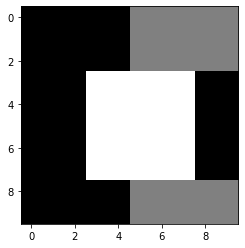

In [265]:
plt.imshow(m.reshape((10,10)), 'gray')

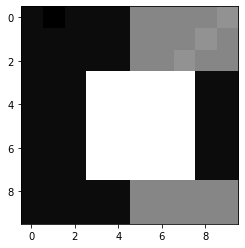

In [267]:
plt.imshow(-Xk[0].reshape((10,10)), 'gray')